In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.preprocessing import StandardScaler,LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

In [21]:
tips=sns.load_dataset("tips")

In [22]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [23]:
df=tips


In [24]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [25]:
cat = []
num = []
for i in df.columns:
    if df[i].dtypes=='object':
        cat.append(i)
    else:
        num.append(i)      
print('The categorical variables are:\n',cat,'\n')
print('The numerical variables are:\n',num)

The categorical variables are:
 [] 

The numerical variables are:
 ['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']


In [26]:
df.groupby('day')['total_bill'].mean()

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

In [27]:
df.groupby('sex')['tip'].mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [28]:
df.groupby('time')['size'].count()

time
Lunch      68
Dinner    176
Name: size, dtype: int64

In [29]:
df['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

In [30]:
df.day.mode()

0    Sat
Name: day, dtype: category
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

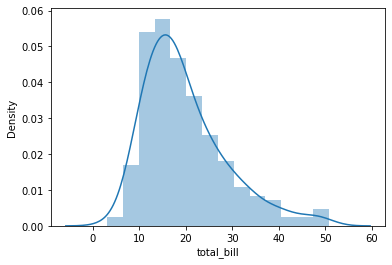

In [31]:
sns.distplot(df['total_bill'])
plt.show()

In [32]:
df['total_bill'].skew()

1.1332130376158205

In [33]:
df[['tip','total_bill']].corr()

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


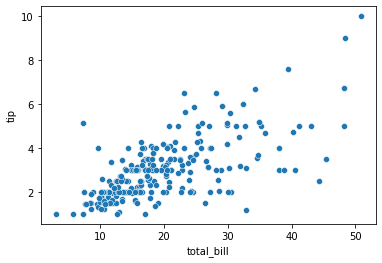

In [34]:
sns.scatterplot(x='total_bill',y='tip',data=df)
plt.show()

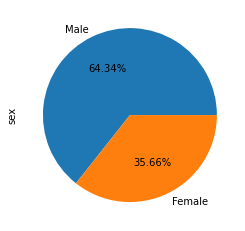

In [35]:
df['sex'].value_counts(normalize=True).plot(kind='pie',autopct='%.2f%%')
plt.show()

In [36]:
df.groupby('sex')['smoker'].value_counts()

sex        
Male    No     97
        Yes    60
Female  No     54
        Yes    33
Name: smoker, dtype: int64

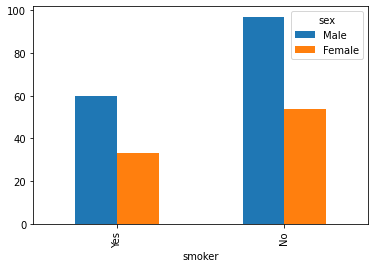

In [37]:
pd.crosstab(df['smoker'],df['sex']).plot(kind='bar')
plt.show()

In [38]:
df.groupby('day')['tip'].mean()

day
Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64

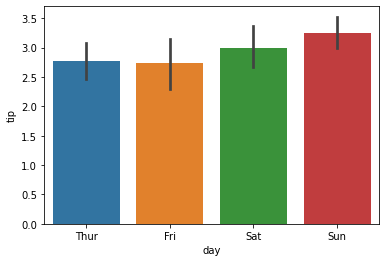

In [39]:
sns.barplot(x='day',y='tip',data=df)
plt.show()

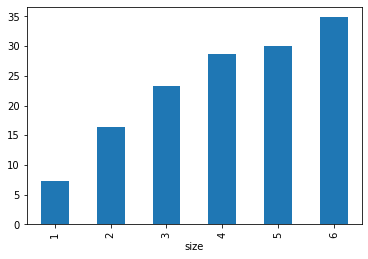

In [40]:
df.groupby('size')['total_bill'].mean().plot(kind='bar')
plt.show()

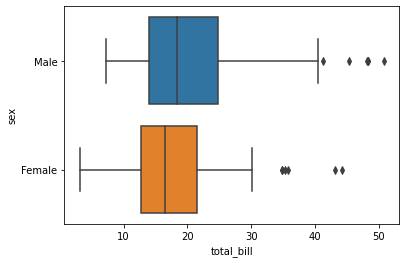

In [41]:
sns.boxplot(x='total_bill',y='sex',data=df)
plt.show()

In [42]:
df.groupby(['time','day'])['total_bill'].max()


time    day 
Lunch   Thur    43.11
        Fri     16.27
        Sat       NaN
        Sun       NaN
Dinner  Thur    18.78
        Fri     40.17
        Sat     50.81
        Sun     48.17
Name: total_bill, dtype: float64

In [43]:
df.isnull().sum()/len(df)*100


total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64

In [44]:
len(df[df.duplicated()])


1

In [45]:
df.drop_duplicates(inplace=True)

In [46]:
len(df[df.duplicated()])

0

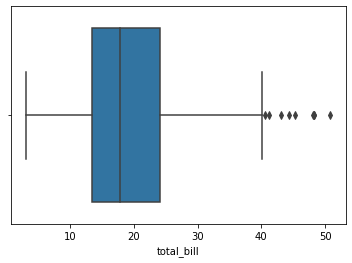

In [47]:
sns.boxplot(df['total_bill'])
plt.show()

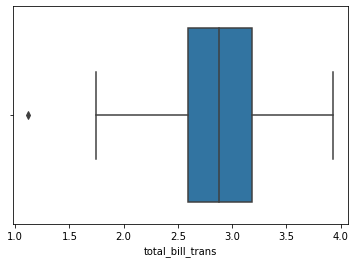

In [48]:
df['total_bill_trans'] = np.log(df['total_bill'])

sns.boxplot(df['total_bill_trans'])
plt.show()

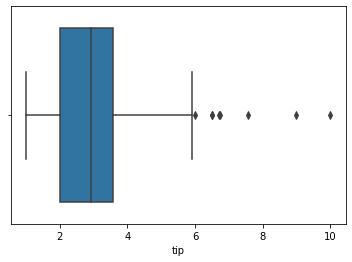

In [49]:
sns.boxplot(df['tip'])
plt.show()

In [50]:
Q1 = df['tip'].quantile(0.25)
Q3 = df['tip'].quantile(0.75)
IQR = Q3-Q1

lower_whisker  = Q1-(1.5*IQR)
upper_whisker  = Q3+(1.5*IQR)

In [51]:
df_out = df.loc[(df['tip'] < upper_whisker) & (df['tip'] > lower_whisker)] 

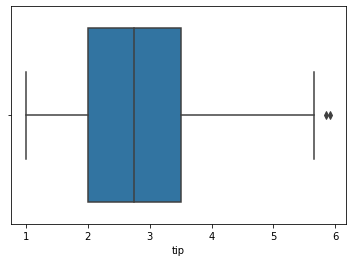

In [52]:
sns.boxplot(df_out['tip'])
plt.show()

In [53]:
df = pd.get_dummies(df,drop_first=True)
df.sample(5)

,total_bill,tip,size,total_bill_trans,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
186,20.90,3.50,3,3.039749,1,0,0,0,1,1
227,20.45,3.00,4,3.017983,0,1,0,1,0,1
117,10.65,1.50,2,2.365560,1,1,0,0,0,0
108,18.24,3.76,2,2.903617,0,1,0,1,0,1
213,13.27,2.50,2,2.585506,1,0,0,1,0,1


In [54]:
tb_max = df['total_bill'].max()
tb_min = df['total_bill'].min()
range_ = tb_max-tb_min
print(range_)

47.74


In [55]:
mm = MinMaxScaler()

In [56]:
df['total_bill_mm'] = mm.fit_transform(df[['total_bill']])

In [57]:
tb_mm_max = df['total_bill_mm'].max()
tb_mm_min = df['total_bill_mm'].min()
range_ = tb_mm_max-tb_mm_min
print(range_)

0.9999999999999999


In [59]:
tips_df = tips.copy()
tips_df=pd.get_dummies(tips,drop_first=True)
tips_df.sample

<bound method NDFrame.sample of      total_bill   tip  size  total_bill_trans  sex_Female  smoker_No  day_Fri  \
0         16.99  1.01     2          2.832625           1          1        0   
1         10.34  1.66     3          2.336020           0          1        0   
2         21.01  3.50     3          3.044999           0          1        0   
3         23.68  3.31     2          3.164631           0          1        0   
4         24.59  3.61     4          3.202340           1          1        0   
..          ...   ...   ...               ...         ...        ...      ...   
239       29.03  5.92     3          3.368330           0          1        0   
240       27.18  2.00     2          3.302481           1          0        0   
241       22.67  2.00     2          3.121042           0          0        0   
242       17.82  1.75     2          2.880321           0          1        0   
243       18.78  3.00     2          2.932792           1          1        0

In [61]:
tips_df = pd.get_dummies(tips_df,drop_first=True)
tips_df.head(2)

,total_bill,tip,size,total_bill_trans,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,2.832625,1,1,0,0,1,1
1,10.34,1.66,3,2.336020,0,1,0,0,1,1


In [62]:
X = tips_df.drop('tip',axis=1)
y = tips_df['tip']

In [67]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)


mm = MinMaxScaler()

X_train.iloc[:,:2] = mm.fit_transform(X_train.iloc[:,:2])
X_test.iloc[:,:2] = mm.transform(X_test.iloc[:,:2])


(170, 9) (73, 9)
(170,) (73,)


In [68]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [69]:
pred = lr.predict(X_test)

In [70]:
print('r2-score test:', r2_score(y_test,pred))

r2-score test: 0.37276662626076473
